In [2]:
import cv2
import os
import numpy as np
import glob
from math import ceil
from matplotlib import pyplot as plt
import matplotlib.image as plt2 
import glob
from scipy.fftpack import fft


In [3]:
#projetando filtro mace a partir de um banco de dados
#projetando matrix X
#realizar a fft de cada imagem e arranjar nas colunas de uma matriz d² x N
#calcular a matriz D a partir do espectro da imagem ao quadrado(armazena numa diagonal)

In [28]:
def MACE_filter(path, d, L): #o parametro "d" serve para redimensionar as imagens de treinamento
                          #o valor padrao para d foi de 64

    soma = np.zeros((d**2, 1))
    X_ = np.zeros((d**2,L))
    i=0
    for img in path:
        n = cv2.imread(img,0)
        n = cv2.resize(n,(d,d))
        X = np.fft.fft2(n)                      #fft da imagem                                                        
        X = np.fft.fftshift(X)
        X_[:,i] = X.flatten()                      #transforma a fft em um vetor d² e armazana na coluna de uma matrix X de dimensao d²xN
        soma = soma + np.abs(X.reshape(d**2,1))**2 #soma dos espectros de potencia
        i = i + 1

    media = soma/i                                 #Calcula a media dos espectros
    u = np.ones((i, 1))                            #Vetor coluna de N linhas.
    D = np.diag(media.flatten())                   #D = diagonal da média do espectro de potencia
    D_inv = np.linalg.pinv(D)                      #Inversa de D 

    #Calculando o filtro a partir dos parâmetros D, X e u especificados acima
    H = np.dot(np.dot(np.dot(D_inv,X_),np.linalg.pinv(np.dot(np.conj(np.transpose(X_)),np.dot(D_inv,X_)))),u) 
    #H = D1*X*((X+*Di*X)^-1)*u
    return H

In [5]:
def teste_correlacao(img, filtro, d):
    #lendo a imagem de teste
    half = int((d**2)/2)
    img = cv2.imread(img, 0)
    img = cv2.resize(img, (d,d))
    #calculando corrlacao
    img_fft = np.fft.fft2(img)           #transformada da imagem de teste
    img_fft = np.fft.fftshift(img_fft)
    img_fft = img_fft.reshape((d**2,1))  #redimensiona a saida para a dimensao do filtro
    teste = img_fft * np.conj(filtro)    #multiplica a transformada da imagem pelo conjugado do filtro
    teste = np.fft.ifftshift(teste)     
    teste = np.fft.ifft2(teste)          #calcula a inversa   
    #teste = np.fft.ifft2(teste)
    teste = np.real(teste)*d*d           #normaliza os valores
    #x = teste[half]
    teste[half] = teste[0]
    teste[0] = 0
    #print(teste[0])
    return teste

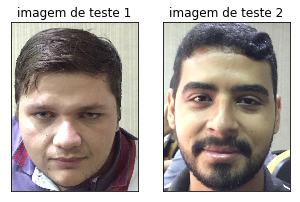

In [30]:
imagem_de_teste_1 = plt2.imread('1.jpeg')
imagem_de_teste_2 = plt2.imread('2.jpeg')

plt.figure(figsize=(5,5))
plt.axis('off')

plt.subplot(121),plt.imshow(imagem_de_teste_1, cmap = 'gray')
plt.title('imagem de teste 1'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(imagem_de_teste_2, cmap = 'gray')
plt.title('imagem de teste 2'), plt.xticks([]), plt.yticks([])
plt.show()

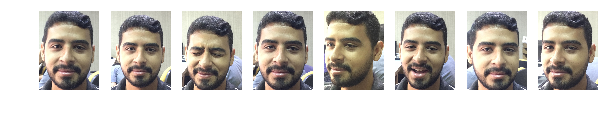

In [31]:
path = glob.glob("data_3/*.jpeg") #selecionando a pasta cotendo as imagens para treinamento do filtro, com imagens .jpeg
L=len(path)
i=1
rows = 1
columns = ceil(len(path))
                                    #printando as imagens de treino do filtro
fig=plt.figure(figsize=(10, 10))
for img in path:
    treino = plt2.imread(img)
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(treino)
    i=i+1
plt.show()

In [32]:
A = MACE_filter(path, 64, L)  #calcula o filtro MACE passando a pasta com as imagens de treino e dimensão de 64 pixels

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ComplexWarning: Casting complex values to real discards the imaginary part
  if sys.path[0] == '':


In [39]:
B = teste_correlacao('2.jpeg', A, 64) #Teste de correlacao usando a imagem de teste 1

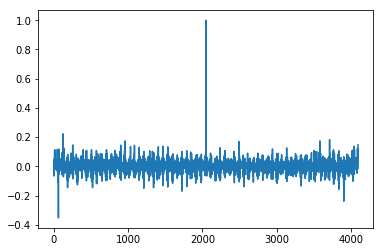

In [40]:
plt.plot((B))                         #plot do grafico de correlacao 2D (opcional 3D)
plt.show()                            # O teste deu positivo para a imagem de especificada

In [41]:
C = teste_correlacao('1.jpeg', A, 64)                #teste de correlacao para a imagem de teste 2

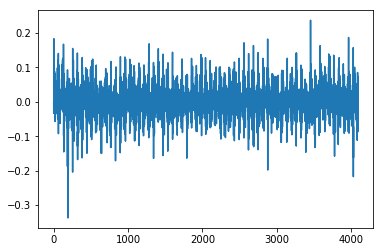

In [42]:
plt.plot(np.real(C))                                 #plotagem do grafico de correlacao
plt.show()                                           #O teste deu negativo para a imagem